# How do I use SVM

關於SVM的介紹，請參考本篇文章 https://greatway9999.blogspot.com/2020/10/machine-learning-model-support-vector.html

接著，希望能透過實作來驗證SVM的特性。驗證的問題摘要如下：

###### 1.當資料非線性可分時，SVM表現如何?
##### 2.當資料中具有重疊的資料點，SVM表現如何?
##### 3.Outliers(離群值)對SVM有什麼影響呢?

## 實作步驟
本篇實作，以經典資料集Iris來驗證上述的疑問。
* Step1.載入基本模組與讀取資料
* Step2.將資料拆分成訓練資料集與測試資料集
* Step3.資料前處理：正規化
* Step4.PCA降維
* Step5.模型訓練：使用不同的kernel
* Step6.模型績效評估
* Step7.模型訓練結果可視化
* Step8.模型優化：參數調整


### Step1.載入基本模組與讀取資料

In [1]:
#載入基本套件
import numpy as np #數值處理的套件
import pandas as pd #資料結構化的套件，可想像成資料科學界中的 Excel
import matplotlib.pyplot as plt #繪圖套件

#在Jupyter notebook中內嵌繪圖
%matplotlib inline 

#讀取資料
from sklearn import datasets #sklearn在 datasets 這個模組中有內建許多經典資料集，Iris 就是其中一項，要使用 Iris，就要先 import datasets
iris = datasets.load_iris() #從 datasets 讀入 Iris
x = pd.DataFrame(iris['data'], columns=iris['feature_names']) #將 Iris 的特徵資料存到 x 變數
print("target_names: "+str(iris['target_names'])) #觀察所有類別標籤的名稱
y = pd.DataFrame(iris['target'], columns=['target']) #將 Iris 的標籤資料存到 y 變數
iris_data = pd.concat([x,y], axis=1) #將特徵資料與標籤資料併成同一份表格，觀察資料整體樣貌
iris_data.head(5) #觀察前五筆資料

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step2.將資料拆分成訓練資料集與測試資料集

In [2]:
from sklearn.model_selection import train_test_split #載入拆分資料的模組 train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_data['target'], test_size=0.3, random_state=0) #將資料拆成訓練資料集(70%)與測試資料集(30%)
X_train.head(5) #檢視前 5 筆的訓練資料

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


### Step3.資料前處理：正規化

In [3]:
from sklearn.preprocessing import StandardScaler #載入資料標準化的模組
sc = StandardScaler() #建立資料標準化之轉換器
X_train_std = sc.fit_transform(X_train) #對 X_train 進行標準化轉換，將轉換後的值存入X_train_std
X_test_std = sc.transform(X_test) #對 X_test 進行標準化轉換，將轉換後的值存入X_test_std
X_train_std[0:5] #檢視前5筆正規化後的訓練資料

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ]])

### Step4.PCA降維

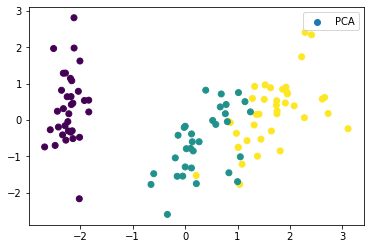

In [4]:
#為方便訓練成果可視化成2維圖形，因此在此步驟使用 PCA 降維 (4個維度 -> 2個維度)

from sklearn.decomposition import PCA #載入PCA模組
pca = PCA(n_components=2) #n_components的參數設定為2，代表降成2個維度
X_train_pca = pca.fit_transform(X_train_std) #對 X_train_std 進行PCA轉換，將轉換後的值存入X_train_pca
X_test_pca = pca.transform(X_test_std) #對 X_test_std 進行PCA轉換，將轉換後的值存入X_test_pca

        
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train, label="PCA") #繪製散佈圖
plt.legend() #顯示圖示
plt.show() #繪圖

In [5]:
from sklearn.svm import SVC #載入SVM模型的模組SVC
linear_svm = SVC(kernel='linear', probability=True) #建立 kernel 為 linear 的 SVM 模型
linear_svm.fit(X_train_pca, y_train) #將訓練資料餵入模型，進行訓練

rbf_svm = SVC(kernel='rbf', probability=True) #建立 kernel 為 rbf 的 SVM 模型
rbf_svm.fit(X_train_pca, y_train)

poly_svm = SVC(kernel='poly', probability=True) #建立 kernel 為 poly 的 SVM 模型
poly_svm.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Step6.模型績效評估

In [6]:
#顯示 kernel 為 linear 的 SVM 模型之訓練與測試資料之準確度
print('linear_svm Train Accuracy: %.2f' % linear_svm.score(X_train_pca,y_train))
print('linear_svm Test Accuracy: %.2f' % linear_svm.score(X_test_pca,y_test))

#顯示 kernel 為 rbf 的 SVM 模型之訓練與測試資料之準確度
print('rbf_svm Train Accuracy: %.2f' % rbf_svm.score(X_train_pca,y_train))
print('rbf_svm Test Accuracy: %.2f' % rbf_svm.score(X_test_pca,y_test))

#顯示 kernel 為 poly 的 SVM 模型之訓練與測試資料之準確度
print('poly_svm Train Accuracy: %.2f' % poly_svm.score(X_train_pca,y_train))
print('poly_svm Test Accuracy: %.2f' % poly_svm.score(X_test_pca,y_test))

linear_svm Train Accuracy: 0.92
linear_svm Test Accuracy: 0.91
rbf_svm Train Accuracy: 0.92
rbf_svm Test Accuracy: 0.93
poly_svm Train Accuracy: 0.90
poly_svm Test Accuracy: 0.89


### Step7.模型訓練結果可視化

In [7]:
from matplotlib.colors import ListedColormap #載入顏色映射模組

#定義決策空間繪圖 function
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


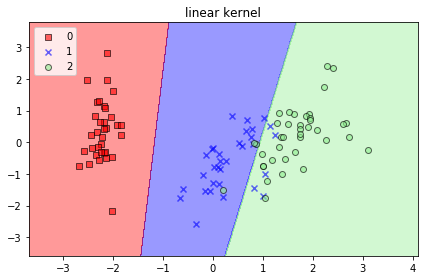

In [8]:
#繪製 kernel 為 linear 的 SVM 模型之分類成效
plot_decision_regions(X_train_pca, y_train, classifier=linear_svm)
plt.title('linear kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


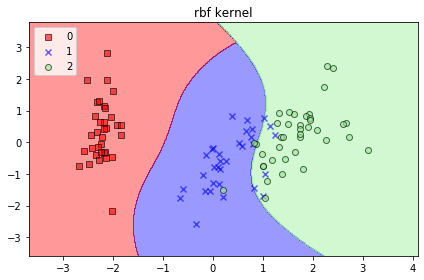

In [9]:
#繪製 kernel 為 rbf 的 SVM 模型之分類成效
plot_decision_regions(X_train_pca, y_train, classifier=rbf_svm)
plt.title('rbf kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


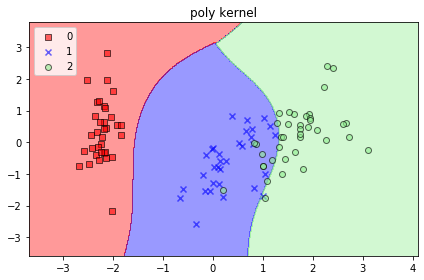

In [10]:
#繪製 kernel 為 poly 的 SVM 模型之分類成效
plot_decision_regions(X_train_pca, y_train, classifier=poly_svm)
plt.title('poly kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Step8.模型優化：參數調整

從剛才的訓練成果來看，表現最好的是 kernel 為 rbf 的 SVM 模型，而 gamma 和 C 這兩個參數對於 kernel 為 rbf 的 SVM 模型有著顯著的影響，因此接下來會試著以這個參數調整來優化模型。

In [11]:
# 使用暴力搜尋的方法來找出最佳參數組合

from sklearn.pipeline import make_pipeline #載入工作管線化模組 make_pipeline
from sklearn.model_selection import GridSearchCV #載入暴力搜尋模組 GridSearchCV

pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1)) #建立管線

param_range = np.arange(0.1, 10, 0.1) #設定參數範圍為0.1~10，間格為0.1。

#設定要暴力搜尋的參數類別
param_grid = [
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

#建立暴力搜尋模型
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_pca, y_train) #將經過PCA後的資料餵入暴力搜尋模型
print(gs.best_score_) #顯示最佳參數組合之模型準確率
print(gs.best_params_) #顯示最佳參數組合

0.9254545454545454
{'svc__C': 1.5000000000000002, 'svc__gamma': 0.2, 'svc__kernel': 'rbf'}


In [12]:
#依照上述參數組合，建立一個新的 SVM 模型
rbf_svm_tune = SVC(kernel='rbf', C = 1.5, gamma = 0.2, probability=True, random_state=1)

rbf_svm_tune.fit(X_train_pca, y_train) #餵入資料進行訓練
print('rbf_svm_tune Train Accuracy: %.2f' % rbf_svm_tune.score(X_train_pca,y_train)) #顯示訓練資料之準確度
print('rbf_svm_tune Test Accuracy: %.2f' % rbf_svm_tune.score(X_test_pca,y_test)) #顯示測試資料之準確度

rbf_svm_tune Train Accuracy: 0.92
rbf_svm_tune Test Accuracy: 0.91


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


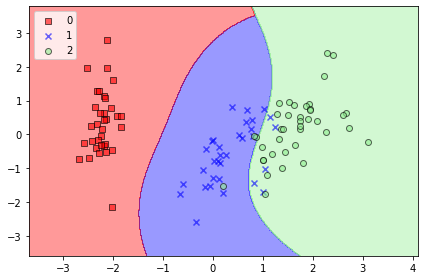

In [13]:
# 繪製 rbf_svm_tune 模型的分類成效
plot_decision_regions(X_train_pca, y_train, classifier=rbf_svm_tune)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 結論
#### 1.當資料非線性可分時，SVM表現如何? 
當資料非線性可分時，以kernel為linear之SVM模型進行分類，成效較差。以kernel為rbf之SVM模型進行分類，成效會較kernel為linear之SVM佳。

#### 2.當資料中具有重疊的資料點，SVM表現如何? 
如圖所示，SVM在資料重疊的情況下，無法正確分類。

#### 3.Outliers(離群值)對SVM有什麼影響呢?
如圖所示，SVM的決策邊界會由各類別中離決策邊界最近的資料點決定，而非離群值。